# Computing persistent Stiefel-Whitney classes of line bundles: demo

Raphaël Tinarrage
<br/>
http://pages.saclay.inria.fr/raphael.tinarrage/

This page describes the implementation and use of the method described in our paper *Computing persistent Stiefel-Whitney classes of line bundles*.

## Background

Let $n,m > 0$, $\mathbb{R}^n$ be the Euclidean space of dimension $n$, $\mathcal{M}(\mathbb{R}^m)$ the space of $m \times m$ matrices, and $\mathcal{G}_1(\mathbb{R}^m)$ the grassmannian of $1$-dimensional subspaces of $\mathbb{R}^m$, seen as a submanifold of $\mathcal{M}(\mathbb{R}^m)$. Note that $\mathcal{G}_1(\mathbb{R}^m)$ is also known as the projective space $\mathbb{P}(\mathbb{R}^m)$.

Let $\gamma > 0$ and endow the space $\mathbb{R}^n \times \mathcal{M}(\mathbb{R}^m)$ with the norm $\vert (x, A)\vert_\gamma = \sqrt{ \vert x \vert_2^2 + \gamma^2 \vert A \vert_\text{F}^2 }$, where $\vert \cdot \vert_2$ denotes the Euclidean norm on $\mathbb{R^n}$, and $\vert \cdot \vert_\text{F}$ the Frobenius norm on $\mathcal{M}(\mathbb{R}^m)$.

Consider a subset $ X \subset \mathbb{R}^n \times \mathcal{M}(\mathbb{R}^m)$.
The filtered Cech bundle of dimension 1 on $X$ is the pair $(\mathbb{X}, p)$, where $\mathbb{X} = (X^t)_{t\geq 0}$ is the Cech filtration of $ X$ in the ambient Euclidean space $(\mathbb{R}^n \times \mathcal{M}(\mathbb{R}^m), \vert \cdot \vert_\gamma)$, and $p = (p^t\colon X^t \rightarrow \mathcal{G}_1(\mathbb{R}^m))_{t\geq 0}$ is the collection of maps $p^t \colon (x, A) \mapsto \pi(A)$, where $\pi(A)$ denotes the projection on the Grassmannian $\mathcal{G}_1(\mathbb{R}^m) \subset \mathcal{M}(\mathbb{R}^m)$.
It is defined on the index set $T = [0, t^\mathrm{max})$, where $t^\mathrm{max}$ is the distance from $X$ to the medial axis of $\mathcal{G}_1(\mathbb{R}^m)$.

The filtered Cech bundle allows to define the persistent Stiefel-Whitney class $w_1( X) = (w_1^t( X))_{t \in T}$. It is a collection of elements of the cohomology groups $H^1(X^t)$.
There exists a $t^\dagger \in T$ such that $w_1^t( X)$ is zero on $[0, t^\dagger)$, and nonzero on $(t^\dagger, t^\mathrm{max})$. We encode this piece of information with the lifespan bar of $w_1( X)$.
It testifies of the orientability of $ X$.

## Datasets

We consider here four datasets:
- (dimension 1) the circle $\mathbb{S}_1 \subset \mathbb{R}^2$ with its tangent bundle
- (dimension 1) the circle $\mathbb{S}_1 \subset \mathbb{R}^2$ with the Möbius bundle
- (dimension 2) the embedded torus $T \subset \mathbb{R}^3$ with its normal bundle
- (dimension 2) the immersed Klein bottle $K \subset \mathbb{R}^3$ with its normal bundle

## Functions

<font color='red'>In order to compile this notebook, please compile first the last box of this notebook, which contains the definition of the functions</font>


We need the following functions:
- **FiltrationMaximalValue**:  Returns the filtration maximal value of the Vietoris-Rips version of the Cech bundle filtration
- **VectorToProjection**: Returns the projection matrix on the linear subspace spanned by a vector
- **ProjectionToVector**: Returns a unit vector on which the matrix A is a projection onto
- **RipsComplex**: Builds the Vietoris-Rips filtration over a point cloud
- **AlphaComplex**: Builds the Delaunay filtration over a point cloud
- **TriangulateProjectiveSpace**: Triangulates the projective space
- **GetMinimalFaceMapProj**: Converts a map between sets to a map between simplicial complexes
- **IsSimplicialMap**: Tests whether a map between simplicial complexes is a simplicial map
- **SimplicesToVerticesMap**: Converts a vertex dictionary to a simplex dictionary
- **GetWeakApproximation**: Returns a random weak approximation to a map
- **ComputeStiefelWhitneyClass**: Computes whether the first Stiefel-Whitney persistent class at time t of a Cech bundle filtration is nonzero
- **GudhiToSageSimplicialComplex**: Transforms a gudhi.SimplexTree to a Sage.SimplicialComplex
- **BarycentricSubdivision**: Barycentric subdivise a simplicial complex 
- **IntersectionLineHyperplane**: Computes the intersection between a line and an affine hyperplane
- **PrintCohomologyWithBasis**: Displays the cohomology groups of a simplicial complex
- **PlotPersistenceBarcodes**: Displays the persistence barcodes of a gd.SimplexTree
- **PlotLifebar**: Displays the lifebar of a persistent Stiefel-Whitney class
- **SampleOnCircleNormalCheck**: Samples the normal bundle of the circle
- **SampleOnCircleMobiusCheck**: Samples the Mobius bundle of the circle
- **SampleOnTorusCheck**: Samples the normal bundle of the torus
- **SampleOnKleinBottleCheck**: Samples the normal bundle of the Klein bottle
- **set_axes_equal**: specify the length of the axes of a 3D plot
- **PlotVectorField**: plot a point cloud, seen as a vector field
- **PlotPCA**: plot a point cloud, after appyling dimensionality reduction via Principal Component Analysis

Computations will mainly use SageMath https://www.sagemath.org/.
We will also work with the Gudhi library https://gudhi.inria.fr/python/latest/.

Note that, in order to ease the reading, we shall not plot the whole persistence diagrams of our datasets, but instead select the bars greater than some value.

## First dataset: normal bundle of the circle

We first fix the parameters $n, m$ and $\gamma$, as described in Background.

In [30]:
gamma = 1
n = 2
m = 2

Then we generate a sample of the normal bundle of the torus, seen as a subset of $\mathbb{R}^2 \times \mathcal{M}(\mathbb{R}^2)$. 
$X$ is a $(N)\times(2+2^2)$ np.array.

In [31]:
N = 50                                                   #number of sampled points 
X = SampleOnCircleNormalCheck(N = N, gamma=gamma)        #generates the dataset

In order to visualize X, which lives in dimension 6, one can use a vector field representation, or project X into lower dimensions.

X can be seen as a vector field as follows: if $x$ is a point of $X$, remember that $x = (y,A)$, where $y$ is a point of $\mathbb{R}^2$, and $A$ a matrix of $\mathcal{M}(\mathbb{R}^2)$ which represents the projection on a 1-dimensional subspace of $\mathbb{R}^2$.
We then display the points $y$ with a segment on it, representing the direction of the corresponding 1-dimensional subspace.

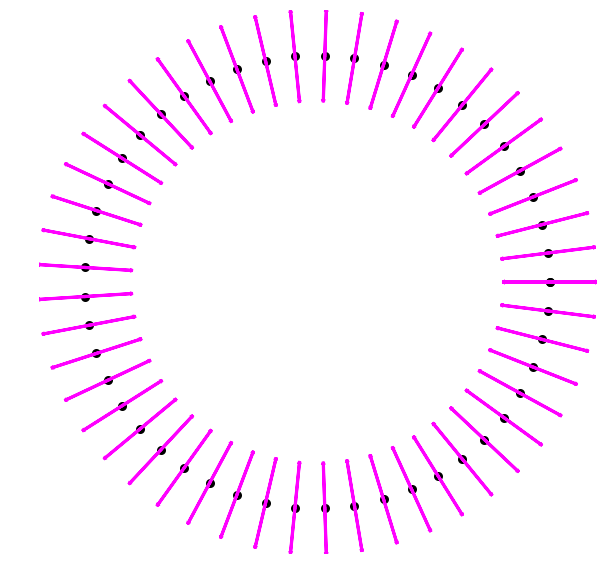

In [38]:
PlotVectorField(X, n)        #vector field representation of X

One can also project $X \subset \mathbb{R}^6$ onto a 3-dimensional subspace, for instance using Principal Component Analysis. 

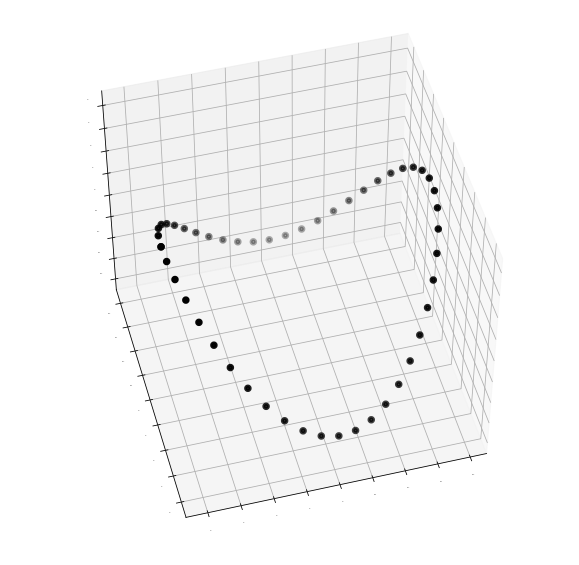

In [8]:
PlotPCA(X)     #representation of X via PCA

At this point, we may visualize the influence of the parameter $\gamma$: the effect of $\gamma$ is to dilate the dataset $X \subset \mathbb{R^n} \times \mathcal{M}(\mathbb{R^m})$ in the $\mathcal{M}(\mathbb{R^m})$-direction.
The more $\gamma$ is large, the more the $\mathcal{M}(\mathbb{R^m})$-coordinate contributes to the distance between points. As one sees below, the points of $X$ with equal $\mathcal{M}(\mathbb{R^2})$-coordinate, that is, antipodal points of the circle, appear closer.

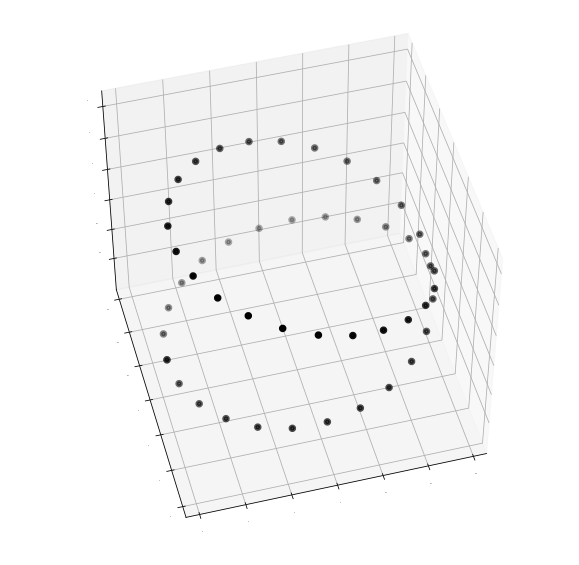

In [9]:
gamma2 = 2
Y = SampleOnCircleNormalCheck(N = N, gamma=gamma2)  #generates the dataset

PlotPCA(Y)                                          #representation of Y via PCA

We now compute the persistence of $X$. We first use the Vietoris-Rips filtration.

Rips Complex is of dimension 4 - 2369935 simplices - 50 vertices. Filtration maximal value is 1.5.


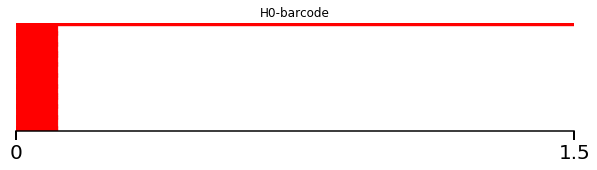

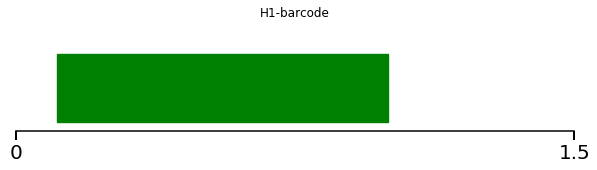

In [10]:
" Persistence of the Rips filtration on X "

tmax = 1.5             #maximal filtration value for the Rips filtration and the persistence
dimension_max = 4      #maximal dimension to expand the Rips filtration

st = RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)  #Rips filtration over X
PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max-1, eps=0.05)        #persistence of the Rips filtration

One observe two salient features: a red bar and a green bar. This corresponds to the homology of a circle, with Betti numbers $(\beta_0, \beta_1) = (1,1)$.

In comparison, we plot the persistence of the Delaunay filtration. This filtration yields a persistence module which is isomorphic to the Cech filtration. 
Note that it admits a clear 3-dimensional feature that did not appear in the Vietoris-Rips filtration.

Alpha-complex is of dimension 5 - 27247 simplices - 50 vertices.


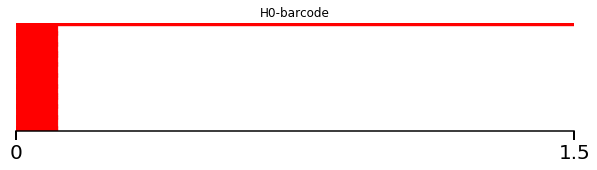

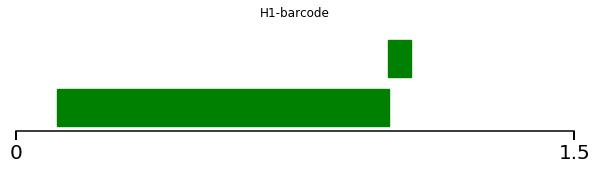

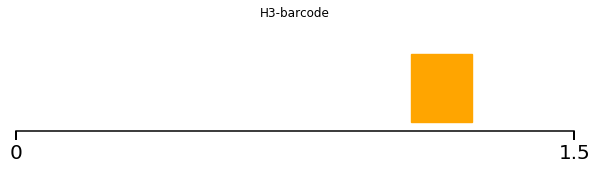

In [11]:
" Persistence of Delaunay filtration on X "

tmax = 1.5        #maximal filtration value for the persistence

st_alpha = AlphaComplex(X)                                                   #Delaunay filtration over X
PlotPersistenceBarcodes(st_alpha, tmax=tmax, d=dimension_max-1, eps=0.05)    #persistence of the Delaunauy filtration over X

One sees here a salient H3-feature. It didn't appear in the Rips filtration because its length was too small.

The cohomology groups can be computed via Sage, once a filtration value $t$ is fixed. 
We start by computing the homology of the Rips complex at some point in the filtration.

In [12]:
" Computing cohomology groups with sage "

t = 0.2                                                     #filtration value
S, S_map = GudhiToSageSimplicialComplex(st, t, n, X)        #transforms the Rips complex at time t into a Sage.SimplicialComplex

PrintCohomologyWithBasis(S, degree_max = dimension_max - 1) #displays the cohomology groups

Simplicial complex with 104 faces
Cohomology in degree 0: Finite family {(0, 0): h^{0,0}}
Cohomology in degree 1: Finite family {(1, 0): h^{1,0}}
Cohomology in degree 2: Finite family {}
Cohomology in degree 3: Finite family {}


At $t=0.2$, we read that $H^0$ and $H^1$ are generated by one element, and $H^2$, $H^3$ are trivial.
This is coherent with the persistence barcode we have seen earlier.

We now look at the Delaunay filtration. As shown below, at time $t=1.1$, we read that $H^3$ is not trivial.

In [13]:
t = 1.1                                                      #filtration value
S, S_map = GudhiToSageSimplicialComplex(st_alpha, t, n, X)   #transforms the Delaunay complex at time t into a Sage.SimplicialComplex

PrintCohomologyWithBasis(S, degree_max = dimension_max - 1)  #displays the cohomology groups

Simplicial complex with 4800 faces
Cohomology in degree 0: Finite family {(0, 0): h^{0,0}}
Cohomology in degree 1: Finite family {}
Cohomology in degree 2: Finite family {}
Cohomology in degree 3: Finite family {(3, 0): h^{3,0}}


We finally compute the persistent Stifel-Whitney class at time $t$ for the Rips complex.
Remember that $t$ must be lower than the maximal filtration value of the corresponding Cech bundle filtration. This maximal filtration value is given by FiltrationMaximalValue().

In [14]:
filtration_max = FiltrationMaximalValue(X, n, m)

The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is 0.500


In [15]:
t = 0.45                                               #filtration value
t=0.5
S, S_map = GudhiToSageSimplicialComplex(st, t, n, X)   #transforms the Rips complex at time t into a Sage.SimplicialComplex

ComputeStiefelWhitneyClass(S, S_map)                   #compute the persistent Stiefel-Whitney class at time t

Simplicial complex with 875 faces
Computing the Stiefel-Whitney class...
The map satisfies the weak star condition
---> The Stiefel-Whitney class is zero <---


The Stiefel-Whitney class is zero, which is coherent with the orientability of the normal bundle of the circle.

According to the persistence barcode, no other $H^1$-feature appears on the interval $[t=0.45, \mathrm{filtration {\_}max})$. We deduce that the persistent Stiefel-Whitney class is always zero, and plot the corresponding lifebar.

The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is 0.500


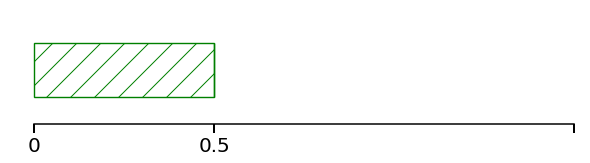

In [16]:
filtration_max = FiltrationMaximalValue(X, n, m)
tdeath = filtration_max

PlotLifebar(tdeath = tdeath, filtration_max = filtration_max, tmax = tmax, col = 1)

## Second dataset: Mobius bundle of the circle

Secondly, we consider a sample of the Mobius bundle of the torus, seen as a subset of $\mathbb{R}^2 \times \mathcal{M}(\mathbb{R}^2)$.
It is a non-orientable vector bundle, known as the universal bundle of the circle.

In [17]:
gamma = 1
n = 2
m = 2

N = 50                                              #number of sampled points 
X = SampleOnCircleMobiusCheck(N = N, gamma=1)       #generates the dataset

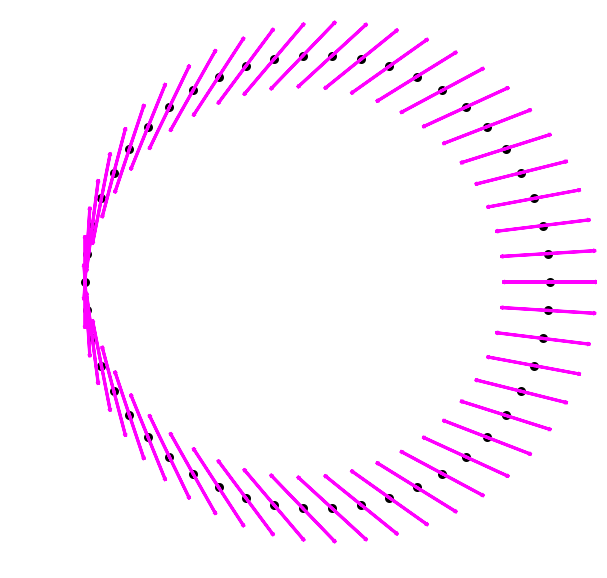

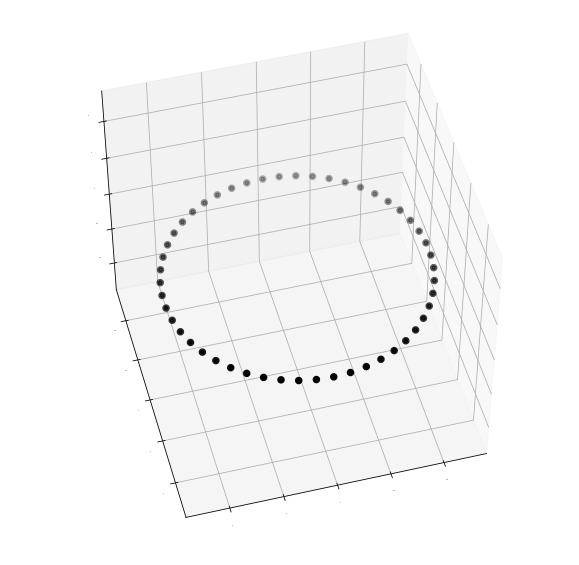

In [18]:
PlotVectorField(X, n)   #vector field representation of X

PlotPCA(X)              #representation of X via PCA

Even if $X$ is a subset of $\mathbb{R}^6$, one shows that it lies in a 2-dimensional affine space, and that it is a circle. This can be visualized in the previous PCA representation.

We now compute the persistence of $X$. 

Rips Complex is of dimension 4 - 2369935 simplices - 50 vertices. Filtration maximal value is 1.5.


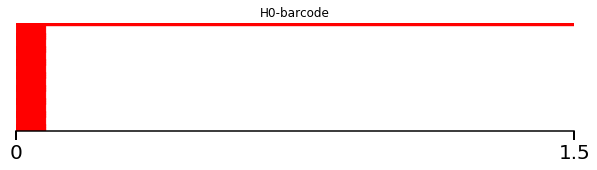

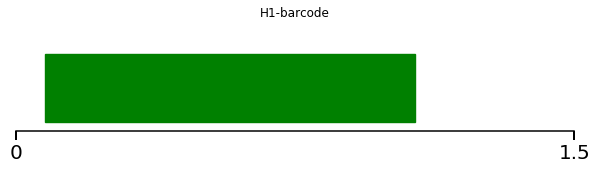

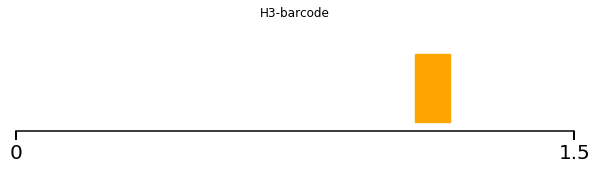

In [19]:
" Persistence of the Rips filtration on X "

tmax = 1.5               #maximal filtration value for the Rips filtration and the persistence
dimension_max = 4        #maximal dimension to expand the Rips filtration

st = RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)    #Rips filtration over X
PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max, eps=0.05)            #persistence of the Rips filtration 

On a large interval, we still read the homology of a circle.

We finally compute the persistent Stifel-Whitney class at time $t$.
Remember that $t$ must be lower than the maximal filtration value of the corresponding Cech bundle filtration. This maximal filtration value is given by FiltrationMaximalValue().

In [20]:
filtration_max = FiltrationMaximalValue(X, n, m)

The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is 0.500


We pick a value of t lower than this maximal filtration value, and compute de persistent Stiefel-Whitney class at time t.

In [21]:
t = 0.1                                                #filtration value

S, S_map = GudhiToSageSimplicialComplex(st, t, n, X)   #transforms the Rips complex at time t into a Sage.SimplicialComplex

ComputeStiefelWhitneyClass(S, S_map)                   #computes the persistent Stiefel Whitney class at time t

Simplicial complex with 100 faces
Computing the Stiefel-Whitney class...
The map satisfies the weak star condition
---> The Stiefel-Whitney class is nonzero <---


The Stiefel-Whintey class is nonzero, which is coherent with the non-orientability of the normal bundle of the circle.

According to the persistence barcode, the only $H^1$-feature is born at time $0.1$. 
We deduce that the persistent Stiefel-Whitney class is zero before 0.1, and nonzero after. It corresponds to the following lifebar.

The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is 0.500


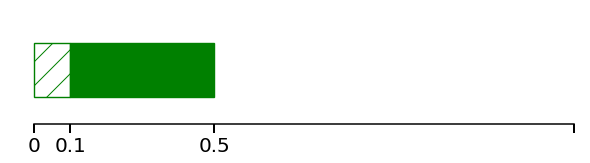

In [22]:
filtration_max = FiltrationMaximalValue(X, n, m)
tdeath = 0.1

PlotLifebar(tdeath = tdeath, filtration_max = filtration_max, tmax = tmax)

Observe that, for values of $t$ smaller than $0.1$, the persistent Stiefel-Whitney class is zero. This happens for instance with $t = 0.05$, value at which the simplicial complex is not even connected.

In [23]:
t = 0.05                                               #filtration value
S, S_map = GudhiToSageSimplicialComplex(st, t, n, X)   #transforms the Rips complex at time t into a Sage.SimplicialComplex

ComputeStiefelWhitneyClass(S, S_map)    

Simplicial complex with 50 faces
Computing the Stiefel-Whitney class...
The map satisfies the weak star condition
---> The Stiefel-Whitney class is zero <---


## Third dataset: normal bundle of the torus

We consider a sample of the normal bundle of the torus, seen as a subset of $\mathbb{R}^3 \times \mathcal{M}(\mathbb{R}^3)$.
It is an orientable vector bundle.

In [2]:
gamma = 1
n = 3
m = 3

N = 100                                                 #square root of initial number of sampled points 
min_dist = 0.5                                          #minimal distance between final points  
X, N_points = SampleOnTorusCheck(N = N, min_dist = min_dist, gamma=gamma)   #generates the dataset

Generating the dataset...
N_points = 505


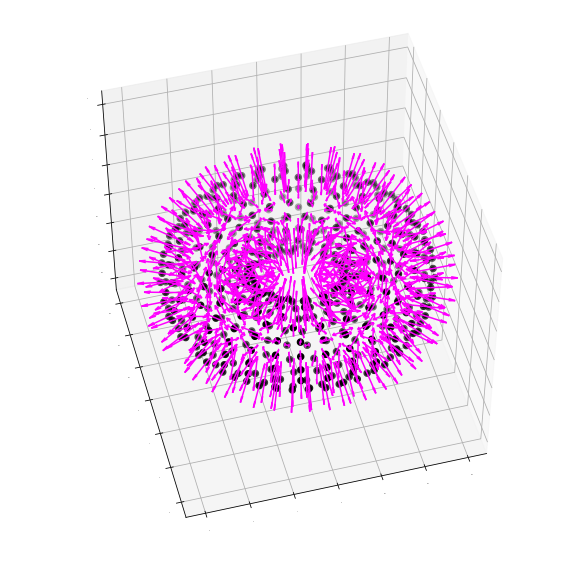

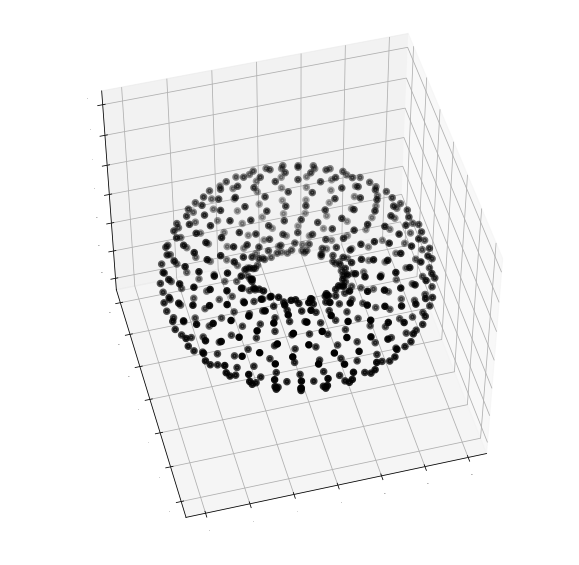

In [3]:
PlotVectorField(X, n)  #vector field representation of X

PlotPCA(X)             #representation of X via PCA

As before, the parameter $\gamma$ influences the (metric) geometry of the set.
As $\gamma$ grows, points with equal $\mathcal{M}(\mathbb{R^3})$-coordinate tend to get closer.

Generating the dataset...
N_points = 1040


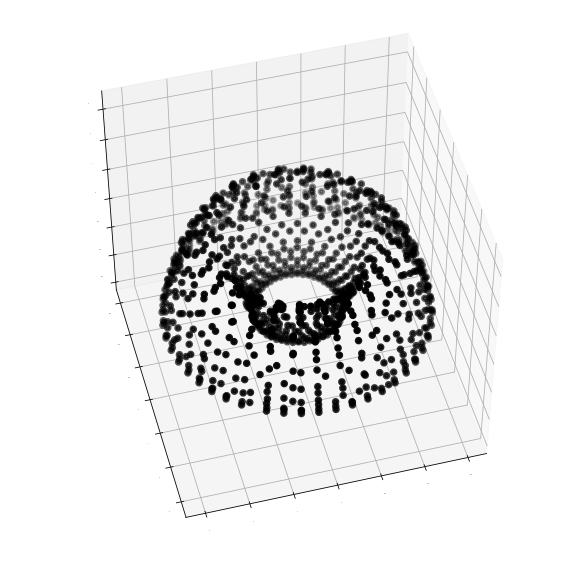

In [4]:
gamma2 = 2

X2, N_points2 = SampleOnTorusCheck(N = N, gamma=gamma2)   #generates the dataset

PlotPCA(X2)      #representation of X2 via PCA

We now compute the persistence of $X$. One recognizes the homology of the torus, i.e., Betti numbers $(\beta_0,\beta_1,\beta_2) = (1,2,1)$.

Rips Complex is of dimension 3 - 1004964 simplices - 505 vertices. Filtration maximal value is 1.0.


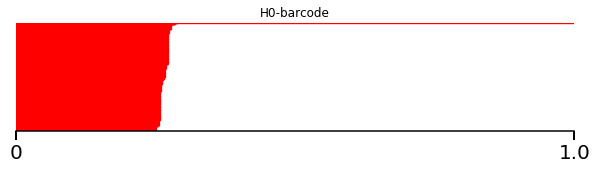

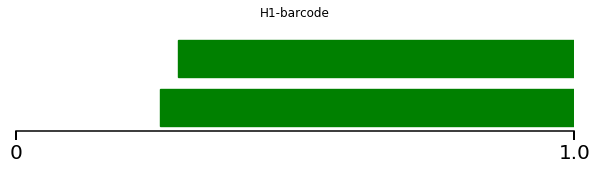

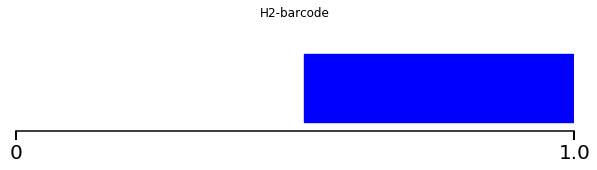

In [5]:
" Persistence of the Rips filtration on X "

tmax = 1                    #maximal filtration value for the Rips filtration and the persistence
dimension_max = 3           #maximal dimension to expand the Rips filtration

st = RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)    #Rips filtration over X
PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max, eps=0.2)             #persistence of the Rips filtration

We finally compute the persistent Stifel-Whitney class at time $t$.
We pick a value of t lower than the maximal filtration value.

In [6]:
filtration_max = FiltrationMaximalValue(X, n, m)

The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is 0.500


By reading the preceding persistence barcode, we choose the value t = 0.3, from which the two $H^1$-features appears.

In [7]:
t = 0.3                                               #filtration value
S, S_map = GudhiToSageSimplicialComplex(st, t, n, X)  #transforms the Rips complex at time t into a Sage.SimplicialComplex

ComputeStiefelWhitneyClass(S, S_map)                  #compute the persistent Stiefel Whitney class at time t

Simplicial complex with 1636 faces
Computing the Stiefel-Whitney class...
The map satisfies the weak star condition
---> The Stiefel-Whitney class is zero <---


The Stiefel-Whintey class is zero, which is coherent with the orientability of the normal bundle of the circle.

According to the persistence barcode, no other $H^1$-feature appears after $t=0.3$.
We deduce that the persistent Stiefel-Whitney class is zero all along the filtration. It corresponds to the following lifebar.

The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is 0.500


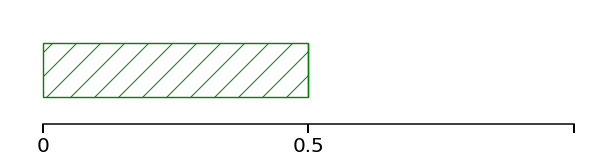

In [8]:
filtration_max = FiltrationMaximalValue(X, n, m)
tdeath = filtration_max

PlotLifebar(tdeath = tdeath, filtration_max = filtration_max, tmax = tmax)

Sometimes, the simplicial complex is not fine enough, and the algorithm may ask to subdivise it.
Let us show an example. As before, we sample a point cloud $X$ on the normal bundle of the torus, but with parameter $\gamma = 3$. Observe that the corresponding bundle filtration admits a larger maximal filtration value: $1.5$.

In [9]:
" Generates the sample X "

gamma = 3
n = 3
m = 3

N = 100                                                 #square root of initial number of sampled points 
min_dist = 1.5                                          #minimal distance between final points  
X, N_points = SampleOnTorusCheck(N = N, min_dist = min_dist, gamma=gamma)   #generates the dataset

" Persistence of the Rips filtration on X "

tmax = 1.5                    #maximal filtration value for the Rips filtration and the persistence
dimension_max = 3             #maximal dimension to expand the Rips filtration

st = RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)    #Rips filtration over X

" Compute the maximal filtration value "

filtration_max = FiltrationMaximalValue(X, n, m)

Generating the dataset...
N_points = 227
Rips Complex is of dimension 3 - 17200 simplices - 227 vertices. Filtration maximal value is 1.5.
The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is 1.500


We now try to compute the persistent Stiefel-Whitney class at time $t=1$.

In [10]:
t = 1                                                 #filtration value
S, S_map = GudhiToSageSimplicialComplex(st, t, n, X)  #transforms the Rips complex at time t into a Sage.SimplicialComplex

ComputeStiefelWhitneyClass(S, S_map)                  #compute the persistent Stiefel Whitney class at time t

Simplicial complex with 1051 faces
Computing the Stiefel-Whitney class...
Impossible choice: the vertex (141,) does not satisfies the weak star condition
---> Subdivise again <---


The algortihm asks to subdivise the simplicial complex. This can be done with the function `BarycentricSubdivision()`.
Here, only one subdivision is enough. 
We try to compute the Stiefel-Whitney class again, and find that the persistent Stiefel-Whitney class is zero.

In [11]:
S2, S_map2 = BarycentricSubdivision(S, S_map)      #subdivises the simplicial complex once

ComputeStiefelWhitneyClass(S2, S_map2)             #computes the persistent Stiefel Whitney class at time t

Subdivising the simplicial complex...
Simplicial complex with 1678 maximal faces
Computing the Stiefel-Whitney class...
The map satisfies the weak star condition
---> The Stiefel-Whitney class is zero <---


## Fourth dataset: normal bundle of the Klein bottle

We consider a sample of the normal bundle of the Klein embedded in $\mathbb{R}^3$. This normal bundle is seen as a subset of $\mathbb{R}^3 \times \mathcal{M}(\mathbb{R}^3)$.
It is an non-orientable vector bundle.

In [12]:
gamma = 1
n = 3
m = 3

N = 100                                                  #square root of initial number of sampled points 
min_dist = 0.4                                           #minimal distance between final points  
X, N_points = SampleOnKleinBottleCheck(N = N, min_dist = min_dist, gamma=1)  #generates the dataset

Generating the dataset...
N_points = 1768


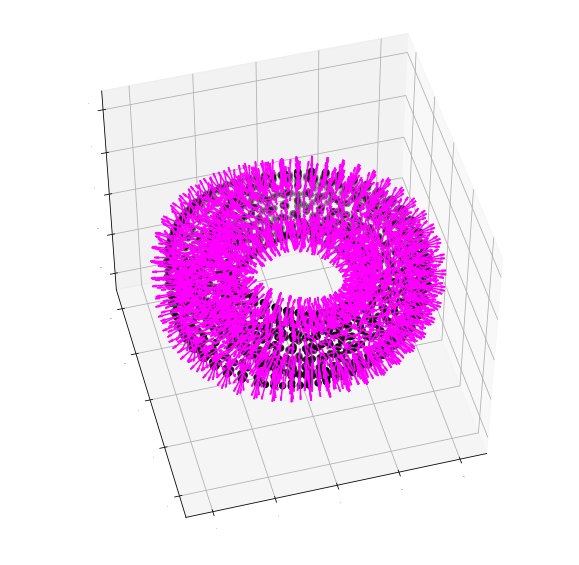

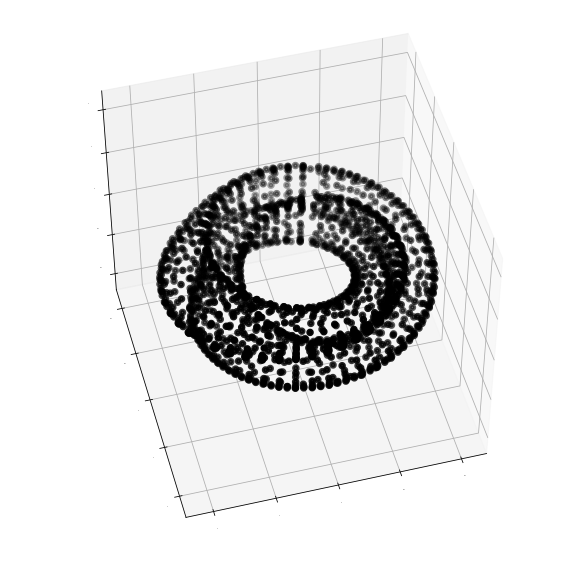

In [13]:
PlotVectorField(X, n)  #vector field representation of X

PlotPCA(X)             #representation of X via PCA 

We now compute the persistence of $X$. Around $t=0.5$, one reads the homology of the Klein bottle (over $\mathbb{Z}/2\mathbb{Z}$): Betti numbers $(\beta_0,\beta_1,\beta_2) = (1,2,1)$.

Rips Complex is of dimension 3 - 81180264 simplices - 1768 vertices. Filtration maximal value is 1.0.


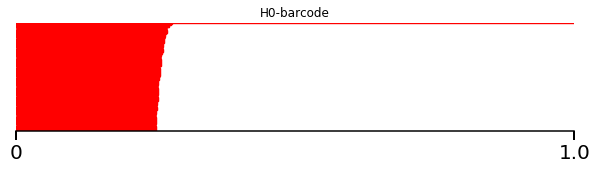

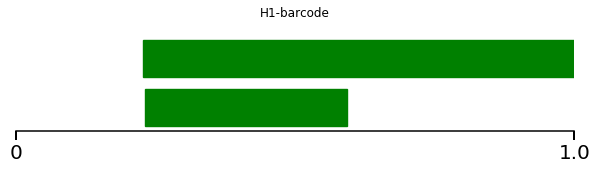

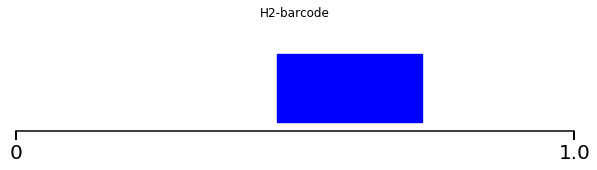

In [14]:
" Persistence of X "

tmax = 1                 #maximal filtration value for the Rips filtration and the persistence                                                   
dimension_max = 3        #maximal dimension to expand the Rips filtration

st = RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)     #Rips filtration over X
PlotPersistenceBarcodes(st, tmax=tmax, d=dimension_max, eps=0.25)             #persistence of the Rips filtration
# ---> long computation time (1'30 minute on my laptop)

We finally compute the persistent Stifel-Whitney class at time $t$.
We have to pick a value of t lower than the maximal filtration value.

In [15]:
filtration_max = FiltrationMaximalValue(X, n, m)

The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is 0.500


By reading the preceding persistence barcode, we choose the value $t = 0.25$, from which the two $H^1$-features appear.

In [16]:
t = 0.25                                               #filtration value
S, S_map = GudhiToSageSimplicialComplex(st, t, n, X)   #transforms the Rips complex at time t into a Sage.SimplicialComplex 

ComputeStiefelWhitneyClass(S, S_map)                   #compute the persistent Stiefel Whitney class at time t
# ---> long computation time (20 minutes on my laptop)

Simplicial complex with 4454 faces
Computing the Stiefel-Whitney class...
The map satisfies the weak star condition
---> The Stiefel-Whitney class is nonzero <---


The Stiefel-Whintey class is nonzero, which is coherent with the non-orientability of the normal bundle of the Klein bottle.

According to the persistence barcode, no other $H^1$-feature appears before $t$.
We deduce that the persistent Stiefel-Whitney class is zero before $t$. It corresponds to the following lifebar.

The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is 0.500


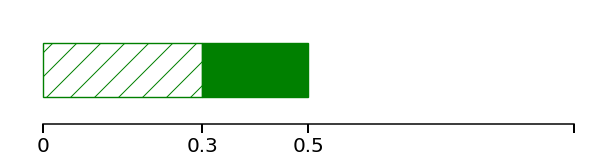

In [17]:
filtration_max = FiltrationMaximalValue(X, n, m)
tdeath = 0.3

PlotLifebar(tdeath = tdeath, filtration_max = filtration_max, tmax = tmax)

# Take-home message

This implementation depends on the parameter $\gamma$, which controls the dilatation of the space $M(\mathbb{R}^m) \subset \mathbb{R}^n \times M(\mathbb{R}^m)$.
The other parameters are tmax, dimension_max and t. The value t must be chosen lower than FiltrationMaximalValue(X, n, m).

``` 
# X is a Nx(n+m^2) np.array, N = number of points, n,m = dimensions of the ambient space
gamma = 1

tmax = 1
dimension_max = 2
st = RipsComplex(X, filtration_max = tmax, dimension_max = dimension_max)

t = 0.3
S, S_map = GudhiToSageSimplicialComplex(st, t, n, X)
ComputeStiefelWhitneyClass(S, S_map)

# if subdivise again
S2, S_map2 = BarycentricSubdivision(S, S_map)
ComputeStiefelWhitneyClass(S2, S_map2)
```

## Functions

In [1]:
import gudhi 
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

COLORS = ['red', 'green', 'blue', 'orange'] # Colors of the persistence barcodes


' ------> Numpy related functions <------ '

def FiltrationMaximalValue(X, n, m): 
    '''
    Returns the filtration maximal value of the Vietoris-Rips version of the Cech bundle filtration of X
    It is equal to D/sqrt(2), where D is the smallest distance between points of X and the medial axis 
    of the Grassmann manifold G_1(R^m) seen in M(R^m)
        
    Input: 
    X: a (N x (n+m^2)) numpy.array, representing a point cloud  
    
    Output: 
    max_value: a numpy.float64
    '''   
    N = np.shape(X)[0]    pl
    DistancesToMed = np.zeros((N,1))
    
    for i in range(N):
        A = np.reshape(X[i, n:(n+m^2)], (m,m))
        S = (A+A.transpose())/2
        Eigenvalues, Eigenvectors = np.linalg.eig(S)
        Eigenvalues_sorted = np.argsort(Eigenvalues)
        DistancesToMed[i] = np.abs(Eigenvalues[0]-Eigenvalues[1])/np.sqrt(2)
        # Distance between A and the medial axis

    max_value = np.min(DistancesToMed)/np.sqrt(2)
    print('The maximal filtration value of the Vietoris-Rips version of the Cech bundle filtration on X is ' + '%.3f' %max_value)
    return max_value

def VectorToProjection(v):
    '''
    Returns the projection matrix on the linear subspace spanned by v
        
    Input: 
    v: a (1 x m) numpy.array, representing a vector in R^m
    
    Output: 
    mat: a (m x m) numpy.array, representing a matrix in M(R^m)
    '''   
    mat = np.outer(v,v)/np.linalg.norm(v)**2
    return mat

def ProjectionToVector(A):
    '''
    Returns a unit vector on which the matrix A is a projection onto
        
    Input: 
    mat: a (m x m) numpy.array, representing a matrix in M(R^m)
    
    Output: 
    v: a (1 x m) numpy.array, representing a vector in R^m
    '''   
    u = np.linalg.svd(A)
    principal_vector = u[0][:,0]
    return principal_vector


' ------> Gudhi related functions <------ '

def RipsComplex(X, filtration_max, dimension_max):
    '''
    Build the Vietoris-Rips filtration over X
        
    Input: 
    X: a (N x M) numpy.array, representing a point cloud of R^M
    filtration_max: maximal filtration value 
    dimension_max: maximal dimension to expand the complex. Must be k+1 to read k homology
    
    Output: 
    st: a gudhi.SimplexTree
    '''   
    N = X.shape[0]
    distances = euclidean_distances(X)                       #pairwise distances
    st = gudhi.SimplexTree()                                 #create an empty simplex tree
        
    for i in range(N):                                       #add vertices to the simplex tree
            st.insert([i], filtration = 0)         

    distances_threshold = distances<2*filtration_max
    indices = zip(*distances_threshold.nonzero())
    for u in indices:                                        #add edges to the simplex tree
        i = u[0]; j = u[1]
        if i<j:                                              #add only edges [i,j] with i<j
            st.insert([i,j], filtration  = distances[i,j]/2)

    st.expansion(dimension_max)                              #expand the flag complex
 
    result_str = 'Rips Complex is of dimension ' + repr(st.dimension()) + ' - ' + \
        repr(st.num_simplices()) + ' simplices - ' + \
        repr(st.num_vertices()) + ' vertices.' +\
        ' Filtration maximal value is ' + '%.1f' %filtration_max + '.'
    print(result_str, flush=True)  
    
    return st

def AlphaComplex(X):
    '''
    Build the Delaunay filtration over X
        
    Input: 
    X: a (N x M) numpy.array, representing a point cloud of R^M
    
    Output: 
    st: a gudhi.SimplexTree
    '''   
    st_alpha = gudhi.AlphaComplex(X).create_simplex_tree()  #create an alpha-complex
    st = gudhi.SimplexTree()                                #create an empty simplex tree

    for filtr in st_alpha.get_filtration():
        st.insert(filtr[0], np.sqrt( filtr[1] ))            #add simplices to the simplex tree, filtration values are square roots of the filtration values alpha complex
     
    result_str = 'Alpha-complex is of dimension ' + repr(st.dimension()) + ' - ' + \
        repr(st.num_simplices()) + ' simplices - ' + \
        repr(st.num_vertices()) + ' vertices.'
    print(result_str, flush=True)  
    
    return st


' ------> Sage related functions <------ '

def TriangulateProjectiveSpace(d = 2):
    '''
    Gives a triangulation P of the projective space of dimension d, P_map the coordinates of its vertices (seen a dxd matrices),
        a triangulation Sphere of the sphere of dimension d, Sphere_map the coordinates of its vertices (seen a dxd matrices),
        and a dictionary RepresentativeSet which is a choice of representative vertices of Sphere for the relation Sphere/~ = ProjectiveSpace
        
    Input: 
    d: an integer, the dimension of the projective space 
    
    Output: 
    P: a Sage.SimplicialComplex, representing a triangulation of the projective space
    P_map: a dictionary {(vertex of P}:(dxd np.array)} representing the coordinates of the vertices of P
    Sphere: a Sage.SimplicialComplex, representing a triangulation of the sphere
    Sphere_map: a dictionary {(vertex of Sphere}:(dxd np.array)} representing the coordinates of the vertices of Sphere
    RepresentativeSet: a dictionary {(vertex of Sphere):(vertex of Sphere)}, representing a choice of representatives for the relation Sphere/~ = ProjectiveSpace
    '''
    # Build the simplicial complex
    Sphere = copy(simplicial_complexes.Simplex(d+1))   #simplex of dimension d+1    
    Sphere.remove_face( tuple(i for i in range(d+2)))  #triangulation of the sphere of dimension d
    Sphere = Sphere.barycentric_subdivision()          #barycentric subdivision
    
    VerticesSimplex = {i for i in range(d+2)}          #set of vertices before subdivision

    EquivalenceRelation = {}                           #dict representing the equivalence relation Sphere/~ = ProjectiveSpace
    for s in Sphere.faces()[0]:
        t = s[0]
        EquivalenceRelation[t] = tuple(VerticesSimplex.difference(t))

    RepresentativeSet = {}                             #dict representing a representative set (we choose the element in the class with the lowest values)
    for s in EquivalenceRelation:
        t = EquivalenceRelation[s]
        S = [s,t]
        smin = min(s)
        tmin = min(t)
        I = [smin, tmin]
        argmin = I.index(min(I))
        RepresentativeSet[s] = S[argmin]     
    
    P = SimplicialComplex()                            #triangulation of the projective space
    for dim in range(Sphere.dimension()+1):
        for s in Sphere.faces()[dim]:
            face = tuple( (RepresentativeSet[t] for t in s ) )
            P.add_face(face)
    P.set_immutable()

    # Define P_map
    origin = np.ones(d+2)/(d+2)

    SimplexVectors = {}
    for i in VerticesSimplex:
        v = np.zeros(d+2)
        v[i] = 1
        SimplexVectors[i] = v

    AffineVectors = np.zeros((d+2,d+1)) 
    for i in range(d+1):
        vector = SimplexVectors[i]-origin
        AffineVectors[:,i] = vector    

    Q, r = np.linalg.qr(AffineVectors)

    ProjectedVectors = {}
    for i in range(d+2):
        vector = SimplexVectors[i]-origin[i]
        ProjectedVectors[i] = np.dot(Q.T, vector)
    
    SimplexProjections = {}
    for i in VerticesSimplex:
        vector = ProjectedVectors[i] 
        SimplexProjections[i] = VectorToProjection(vector)
        
    P_map = {}
    for V in P.vertices():
        A = np.zeros((d+1,d+1))
        for v in V:
            A = A + SimplexProjections[v]   
        #Project A on Grassmannian
        S = (A+A.transpose())/2
        Eigenvalues, Eigenvectors = np.linalg.eig(S)
        Eigenvalues_sort = np.argsort(Eigenvalues)
        Eigenvector = Eigenvectors[:,Eigenvalues_sort[-1]]
        Proj = np.outer(Eigenvector, Eigenvector)    
        P_map[V] = Proj
        
    # Define Sphere_map
    Sphere_map = {}
    for V in Sphere.vertices():
        A = np.zeros((1,d+1))
        for v in V:
            A = A + ProjectedVectors[v]/np.linalg.norm(ProjectedVectors[v])
        Sphere_map[V] =  A/np.linalg.norm(A) 
   
    return P, P_map, Sphere, Sphere_map, RepresentativeSet        

def GetMinimalFaceMapProj(S, S_map, Sphere, Sphere_map, RepresentativeSet):
    '''
    Returns the minimal face map corresponding to the map S_map : S --> Sphere, post-composed with Sphere --> ProjectiveSpace 
    RepresentativeSet is a set of representative points of the relation Sphere/~ = ProjectiveSpace.
    It first computes MinimalFaceMapSphere, which is the minimal face map corresponding to the map S_map: S --> Sphere, which is a dict {(vertex of S):(np.array)}
        MinimalFaceMap is a dictionary {(vertex of S):(simplex of Sphere)}
    
    Input:
    S: a Sage.SimplicialComplex
    S_map: a dictionary {(vertex of S):((mxm) np.array)}, representing a map: S --> |G_1(R^m)|
    Sphere: a Sage.SimplicialComplex, representing triangulation of the sphere
    Sphere_map: a dictionary {(vertex of Sphere):(np.array)}, representing the coordinates of the vertices of Sphere
    
    Output:
    MinimalFaceMapProj: a dictionary {(vertex of S):(simplex of Projectivespace)}
    '''
    #Get MinimalFaceMapSphere
    MinimalFaceMapSphere = {}
    d = Sphere.dimension()
    for v in S.vertices():
        v_proj = S_map[v]
        v_vect = ProjectionToVector(v_proj)

        DistancesToFaces = {}
        BarCoordinates = {}
        for face in Sphere.faces()[d]:
            list_vertices = [Sphere_map[vertex][0] for vertex in face]
            
            intersect, bar_coords, distance = IntersectionLineHyperplane(v_vect, list_vertices)
            if intersect:
                if prod(bar_coords>=0):
                    DistancesToFaces[face] = distance
                    BarCoordinates[face] = bar_coords
        face_min = min(DistancesToFaces.keys(), key=(lambda k: DistancesToFaces[k])) 
            #closest face to v, among the faces such that v project onto its convex hull
        list_vertices = [Sphere_map[vertex][0] for vertex in face_min]
        bar_coords = BarCoordinates[face_min] 
        MinimalFaceMapSphere[v] = Simplex([list(face_min)[i] for i in range(d+1) if bar_coords[i]>0 ])
            #the minimal face corresponds to the simplex spanned by the vertices of face_min
            #such that the projection of v onto it has nonzero barycentric coordinates
    
    #Get MinimalFaceMapProj
    MinimalFaceMapProj = {}
    for v in S.vertices():
        FaceSphere = MinimalFaceMapSphere[v]
        FaceProj = Simplex([ RepresentativeSet[vertex] for vertex in FaceSphere ])
        MinimalFaceMapProj[v] = FaceProj

    return MinimalFaceMapProj
    
def IsSimplicialMap(X, Y, f):
    '''
    Tests whether the map f between simplicial complexes X and Y is simplicial
    
    Input:
    X: a Sage.simplicial complex
    Y: a Sage.simplicial complex
    f: a dictionary {(vertex of X):(vertex of Y)}
    
    Output:
    '''
    is_simplicial = 1
    dim = X.dimension()
    Y_faces = Y.faces()
    for k in range(dim+1):
        for i in X.faces()[k]:
            tup = i.tuple()
            fi = []
            for j in tup:
                fi.append(f[j])
            v = Simplex(set(fi))
            if not v in Y_faces[v.dimension()]:
                is_simplicial = 0
                break
    if is_simplicial:
        print('It is simplicial')
        return True
    else:
        print('Not simplicial: '+str(i)+' is sent to '+str(v))
        return False
    
def SimplicesToVerticesMap(f):
    '''
    Converts a dictionary {(simplex of dim 0):(simplex of dim 0)} to a dictionary {vertex:vertex}
    
    Input:
    f: a dictionary {(simplex of dim 0 of S):(simplex of dim 0 of L)}, where S and L are Sage.SimplicialComplex

    Output:
    g: a dictionary {(vertex of S):(vertex of L)}, where S and L are Sage.SimplicialComplex
    '''
    g = {}
    for v in f:
        g[ list(v)[0] ] = list(f[v])[0]
    return g

def GetWeakApproximation(S, L, face_map):
    '''
    Returns a random weak approximation to the map (face_map: S^{(0)} --> L). If face_map does not satisfies the weak star condition, returns False. 
    It first computes the dictionaries CorrespondingSimplices and AdmissibleVertices.
    CorrespondingSimplices is a dictionary { (vertex of S):(list of simplices of L) }, 
        where each simplex is the image of the neighbors of the vertex of S by the minimal face map.
    AdmissibleVertices is a dictionary { (vertex of S):(list of vertices of L) }, 
        where the list contains the vertices of L which satisfies the weak star condition for the vertex in S.
    The weak approximation is selected by picking for each vertex of S a random admissible vertex of L.
    
    Input: 
    S: a Sage.SimplicialComplex
    L: a Sage.SimplicialComplex
    face_map: a dictionary { (vertex of S):(face of L) }
    
    Output:
    '''   
    #Get CorrespondingSimplices
    CorrespondingSimplices = {}
    Neighbors = {}
    for v in S.faces()[0]:                                              #Compute the neighbors
        Neighbors[v] = S.graph().neighbors(list(v)[0], closed = True)    
    for v in S.faces()[0]:                                              #Compute the corresponding simplices
        Simplices = []
        for w in Neighbors[v]:
            Simplices.append(face_map[w])
        CorrespondingSimplices[v] = set(Simplices)
    
    #Get AdmissibleVertices
    AdmissibleVertices = {}   
    for v in S.faces()[0]:
        AdmissibleVerticesv = []
        for w in L.faces()[0]:
            is_w_included = True
            for simplex in CorrespondingSimplices[v]:
                if not set(w).issubset(simplex):
                    is_w_included = False
            if is_w_included:
                AdmissibleVerticesv.append(w)
        AdmissibleVertices[v] = AdmissibleVerticesv
    
    #Test star condition, i.e. tests whether each vertex of S admits a vertex in L
    test_star_condition = True
    for v in S.faces()[0]:
        if not AdmissibleVertices[v]:            
            test_star_condition = False
            vertex_issue = v                       #a vertex which does not satisfies the star condition

    if test_star_condition:   
        print('The map satisfies the weak star condition')
        
        #Get a random weak approximation
        RandomChoiceAdmissibleVertices = {}    
        for v in S.faces()[0]:
            RandomChoiceAdmissibleVertices[v] = random.choice(AdmissibleVertices[v])
        return RandomChoiceAdmissibleVertices
    
    else:
        print('Impossible choice: the vertex '+str(vertex_issue)+' does not satisfies the weak star condition', flush = True)
        return False

def ComputeStiefelWhitneyClass(S, S_map):
    '''
    Computes whether the first Stiefel-Whitney class of the vector bundle (S, S_map) is zero.
    If the map does not satisfies the weak star condition, it asks to subdivise again.
    If S,S_map = GudhiToSageSimplicialComplex(st, t, X_check), then this Stiefel-Whitney class corresponds to the persistent Stiefel-Whitney class at time t

    Input: 
    S: simplicial complex (sage)
    S_map: a dict from the vertices of S to the mxm np.arrays
    
    Output:
    '''
    print('Computing the Stiefel-Whitney class...', flush = True)
    #Defining the minimal face map
    m = int(np.shape(S_map[next(iter(S_map))])[0])         #get the integer m
    d=m-1
    P, P_map, Sphere, Sphere_map, RepresentativeSet = TriangulateProjectiveSpace(d)
    face_map = GetMinimalFaceMapProj(S, S_map, Sphere, Sphere_map, RepresentativeSet)
   
    #Computing cohomology
    f = GetWeakApproximation(S, P, face_map)      #generates a weak approximation. If it exists, it is a simplicial map
    if f:
        g = SimplicesToVerticesMap(f)
#        print(IsSimplicialMap(S, P, g))           #not necessary, since each weak simplicial approximation is a simplicial map
        k = GF(2)
        Homomorphisms = Hom(S,P)
        G = Homomorphisms(g)
        g_star = G.induced_homology_morphism(k, cohomology=true)
        cohomology_matrix = g_star.to_matrix(1)
        if cohomology_matrix==0:
            print('---> The Stiefel-Whitney class is zero <---')
        else:
            print('---> The Stiefel-Whitney class is nonzero <---')
    else:
        print('---> Subdivise again <---', flush = True)
    
def GudhiToSageSimplicialComplex(st, t, n, X_check=[]):
    '''
    Transforms a gudhi.SimplexTree (st) to a Sage.SimplicialComplex (S), representing the simplicial complex at time t. 
    If X_check is nonempty, also return a dictionary {(vertex of S):(corresponding point of X_check)} (S_map)    
        
    Input: 
    st: a gudhi.SimplexTree
    t: a non-negative value
    n: an integer
    X_check: a Nx(n+m^2) np.array
    
    Output : 
    S : simplicial complex (sage)
    S_map : a dict from the vertices of S to the mxm np.arrays
    '''
    #Creating the Sage simplicial complex
    L = []
    for filtered_simplex in st.get_filtration(): 
        if filtered_simplex[1]<=t:
            simplex = filtered_simplex[0]
            L.append(simplex)
    print('Simplicial complex with '+str(len(L)) + ' faces', flush=True)

    S = SimplicialComplex(L, is_mutable=False)
    
    if list(X_check):
        m = int(sqrt(np.shape(X_check)[1]-n))
        S_map = {i:np.reshape(X_check[i, n:(n+m^2)], (m,m)) for i in range(st.num_vertices())}
        return S,S_map
    else:
        return S
    
def BarycentricSubdivision(S, S_map):
    '''
    Barycentric subdivise the Sage.SimplicialComplex S.
    If S_map in nonempty, returns a new map {(vertex of S):(matrix)}, corresponding to the shadow map 
    
    Input: 
    S: a Sage.SimplicialComplex
    S_map : a dict from the vertices of S to the mxm np.arrays
    
    Output : 
    SS : a Sage.SimplicialComplex
    SS_map : a dict from the vertices of SS to the dxd np.arrays
    '''
    print('Subdivising the simplicial complex...', flush = True)
    SS = S.barycentric_subdivision()
    SS.set_immutable()
    print('Simplicial complex with '+str(len(SS.facets())) + ' maximal faces', flush=True)

    if S_map:
        SS_map = {}
        for v in SS.vertices():
            liste = [S_map[i] for i in v]
            matrix = np.mean(np.asarray(liste),0)     #barycentric points are mapped to barycenters of matrices (shadow map)
            SS_map[v] = matrix
        return SS, SS_map
    else:
        return SS
    
def IntersectionLineHyperplane(v, list_vertices):
    """
    Gives the point of intersection between a line (spanned by v) and a hyperplane (spanned by the points of list_vertices)
    Returns False if they do not intersect
    If they do, return the barycentric coordinates of the intersection points, 
        and the distance between the original point and the intersection point
    
    If h is a vector orthogonal to this hyperplane, and x_0 any point of this hyperplane, 
        then this intersection point is l*v, where l = <x_0,h>/<v,h>.
    Hence the distance between v and this intersection point is |1-l|*norm(v)
    
    In order to get the barycentric coordinates of this intersection point, we first compute the linear coordinates of it
        in the basis given by {list_vertices[i+1] - list_vertices[0], i}.

    Input: 
    v: a (1xm) np.array 
    list_vertices: a list of length (m)  of (1xm) np.array 
    
    Output:
    intersect: True or False
    coord_bar: a (1xm) np.array
    distance: a real number
    """
    d = len(list_vertices)-1
    face_linspace = np.zeros((d+1,d))
        #a matrix containing a basis of the corresponding linear subspace, origin being list_vertices[0]
    for i in range(d):
        face_linspace[:, i] = list_vertices[i+1] - list_vertices[0]
    
    q,r = np.linalg.qr(face_linspace, mode = 'complete')
        #QR decomposition (remark : r is invertible since the vertices are affinely independant)
    h = q[:, d]
        #h is a vector orthogonal to the affine hyperplane spanned by list_vertices
    s = np.inner(v, h)
    if s==0:
        intersect = False
        coord_bar = np.NAN
        distance = np.NAN
    else:
        intersect = True
        l = np.inner(list_vertices[0], h)/s
        distance = np.abs(1 - l)
        
        v_intersection = l*v
        w = v_intersection-list_vertices[0]        
        q,r = np.linalg.qr(face_linspace, mode='reduced')
            # QR decomposition (remark : r is invertible since the vertices are affinely independant)    
        coord_lin = w.dot(q)
            #coordinates of w in the orthonormal basis given by q
        coord_face = np.linalg.inv(r).dot(coord_lin)
            #coordinates of w in the basis given by face_linspace    
        coord_bar = np.append( 1-sum(coord_face),coord_face)
            #barycentric coordinates of v_intersection
        epsilon = np.finfo(float).eps*10 
            #a small value 
        coord_bar[np.abs(coord_bar) < epsilon] = 0
            #in order to identify zero values, we shrink the coordinates of coord_bar 

    return intersect, coord_bar, distance

    
' ------> Graphics related functions <------ '

def PrintCohomologyWithBasis(S, degree_max = 0):
    '''
    Display the cohomology groups of the simplicial complex S.
    If degree_max is nonzero, diplays only cohomology groups of dimension not greater than degree_max
    
    Input:
    S: a Sage SimplicialComplex
    '''
    H = S.cohomology_ring( GF(2) )

    if not degree_max:
        degree_max = S.dimension()
    for i in range(degree_max+1):
        print('Cohomology in degree '+str(i)+':'+' ', end='')
        print(H.basis(i))

def PlotPersistenceBarcodes(st, tmax = 1, d=2, eps = 0, hide_small_infinite_bars = False, 
                            barcode_index = [],
                            homology_coeff_field = 2, xtick = 0, xticks = []):
    '''
    Display persistence barcodes of the filtration given by st
    
    Input:
    st: a gudhi.SimplexTree
    tmax: maximal filtration value to plot the barcodes
    d: maximal dimension to compute the persistence
    eps: minimal length of displayed bars
    hide_small_infinite_bars: if False, do not display bars of length < epsilon which exceed the maximal filtration value
    barcode_index: array containing the dimensions to plot the barcodes. By default: range(d+1)
    xticks: a list of xticks 
    homology_coeff_field: Field of coefficients to compute the persistence
    xtick: if nonzero, add a xtick to the barcodes
    xticks: a list of x ticks. If nonempty, replace the default ticks by this list
    '''
    st.persistence(homology_coeff_field = homology_coeff_field)    #compute the persistence

    ' Plot the persistence barcodes '
    width = 0.75       # width of the bars
    eps1 = .1          # y margin
    eps2 = .0          # x margin
    labelsize = 12     # size of x ticks
    
    if not barcode_index: 
        barcode_index = range(d+1)
    for i in barcode_index:
        diagram = st.persistence_intervals_in_dimension(i)
        if hide_small_infinite_bars:
            diagram = [t for t in diagram if min(t[1], tmax)-t[0] > eps]          #select large enough bars
            diagram = [[t[0], min(t[1], tmax)] for t in diagram]                  #threshold the bars exceeding tmax
        else:
            diagram = [t for t in diagram if t[1]-t[0] > eps]                     #select large enough bars
            diagram = [[t[0], min(t[1], tmax)] for t in diagram]                  #threshold the bars exceeding tmax
        if diagram:
            color = COLORS[i]
            fig = plt.figure( figsize=(10,2) )
            ax = plt.axes(frameon=True)    
            for j in range(len(diagram)):
                t = diagram[j]
                plt.fill([t[0], t[1], t[1], t[0]], [j, j, j+width, j+width], fill=True, c=color, lw = 1.4)

            ax.set_xlim(-eps2, tmax+eps2)
            ax.spines['bottom'].set_visible(True)
            ax.spines['bottom'].set_bounds(0, tmax)
            ax.spines['bottom'].set_linewidth(1.5)  
            if xticks:
                plt.xticks(xticks)
            else:
                if xtick:  
                    plt.xticks([0, xtick, tmax])
                    ax.set_xticklabels([str(0), '%.1f' %xtick, '%.1f' %tmax])
                else:      
                    plt.xticks([0, tmax])
                    ax.set_xticklabels([str(0), '%.1f' %tmax])
            ax.tick_params(axis='both', which='major', labelsize=20, size = 9, width = 2) 
            ax.axes.get_yaxis().set_visible(False)
            ax.set_ylim(-eps1, len(diagram) + eps1)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)     
            plt.title('H'+str(i)+'-barcode')
            
def PlotLifebar(tdeath = .1, filtration_max = 0.7, tmax = 1, col = 1):
    '''
    Display a lifebar of a persistent Stiefel-Whitney class (x^t)
    
    Input:
    filtration_max: maximal filtration value of the underlying Cech filtration
    tmax: maximal filtration value of the Cech bundle filtration
    tdeath: death time of the persistent class. Defined as sup(0, inf(t, x^t \neq 0))
    col: color of the lifebar
    ticks: a list of strings, xticks labels
    '''
    pos = 0            # y-position of the bar
    width = 0.2        # width of the bar
    eps = .1           # y margin
    eps2 = .05         # xmargin
    labelsize = 18     # size of x ticks
    color = COLORS[col]

    fig = plt.figure( figsize=(10,2) )
    ax = plt.axes(frameon=True)

    plt.fill([0, tdeath, tdeath, 0], [pos, pos, pos+width, pos+width], fill=False, hatch='/', c=color, lw = 1.4)
    plt.fill([tdeath, filtration_max, filtration_max, tdeath], [pos, pos, pos+width, pos+width], fill=True, c=color, lw = 1.4)

    ax.set_xlim(-eps2, filtration_max+eps2)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_bounds(0, tmax)
    ax.spines['bottom'].set_linewidth(1.5)
    plt.xticks([0,tdeath,filtration_max, tmax])
    if tdeath==0:                ax.set_xticklabels([0, '', '%.1f' %filtration_max])
    elif tdeath==filtration_max: ax.set_xticklabels([0, '', '%.1f' %filtration_max])
    else:                        ax.set_xticklabels([0, '%.1f' %tdeath, '%.1f' %filtration_max])
    ax.tick_params(axis='both', which='major', labelsize=20, size = 9, width = 2)    
    
    ax.axes.get_yaxis().set_visible(False)
    ax.set_ylim(-eps, pos+width + eps)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
        
def SampleOnCircleNormalCheck(N = 100, gamma=1, sd = 0):
    '''
    Returns a uniform N-sample of the normal bundle of the circle, with underlying norm with parameter gamma.
    If sd is nonzero, returns a noisy sample
    
    Input:
    N: number of points to sample
    gamma: parameter of the underlying norm
    sd: standard deviation of the noise
    
    Output:
    X_check: a (N x (2+2^2)) np.array, representing the vector bundle
    '''
    U = np.linspace(0, 2*np.pi, N)
    Xdata = np.cos(U)
    Ydata = np.sin(U)
    XXnormal = gamma*np.cos(U)**2
    YYnormal = gamma*np.sin(U)**2
    XYnormal = gamma*np.cos(U)*np.sin(U)

    X_check = np.vstack((Xdata,Ydata, XXnormal, XYnormal, XYnormal, YYnormal)).T
    if sd:
        X_check = X_check + np.random.normal(loc = 0, scale = sd, size = np.shape(X_check))
    
    return X_check

def SampleOnCircleMobiusCheck(N = 100, gamma=1, sd = 0):
    '''
    Returns a uniform N-sample of the Mobius bundle of the circle, with underlying norm with parameter gamma.
    If sd is nonzero, returns a noisy sample
    
    Input:
    N: number of points to sample
    gamma: parameter of the underlying norm
    sd: standard deviation of the noise
    
    Output:
    X_check: a (N x (2+2^2)) np.array, representing the vector bundle
    '''
    U = np.linspace(0, 2*np.pi, N+1)[:-1]
    Xdata = np.cos(U)
    Ydata = np.sin(U)
    XXnormal = gamma*np.cos(U/2)**2
    YYnormal = gamma*np.sin(U/2)**2
    XYnormal = gamma*np.cos(U/2)*np.sin(U/2)
    
    X_check = np.vstack((Xdata,Ydata, XXnormal, XYnormal, XYnormal, YYnormal)).T
    if sd:
        X_check = X_check + np.random.normal(loc = 0, scale = sd, size = np.shape(X_check))
    
    return X_check      

def SampleOnTorusCheck(N = 100, min_dist = 0.5, gamma=1):
    '''
    Returns a uniform sample of the normal bundle of the torus, seen in R^3, with underlying norm with parameter gamma.
    The initial number of points is N^2, and the sample is then sparsified with minimal distance between points being min_dist 
    
    Input:
    N: square root of the initial number of points to sample
    min_dist: final minimal distance between points
    gamma: parameter of the underlying norm
    
    Output:
    X_check: a (N x (3+3^2)) np.array, representing the vector bundle
    N_points: the number of final points
    '''
    print('Generating the dataset...', flush=True)    
    U = np.linspace(0, 2*np.pi, N)
    V = np.linspace(0, 2*np.pi, N)
    Xdata = np.zeros((N,N))
    Ydata = np.zeros((N,N))
    Zdata = np.zeros((N,N))
    X_normal = []
    
    for i in range(N):
        for j in range(N):
            u = U[i]
            v = V[j]
            x = (2+np.cos(u))*np.cos(v)
            y = (2+np.cos(u))*np.sin(v)
            z = np.sin(u)
            Xdata[i,j] = x
            Ydata[i,j] = y
            Zdata[i,j] = z
            normal = np.array([np.cos(v)*np.cos(u), np.sin(v)*np.cos(u), np.sin(u)])
            X_normal.append(normal)
   
    Xf = np.matrix.flatten(Xdata)
    Yf = np.matrix.flatten(Ydata)
    Zf = np.matrix.flatten(Zdata)
    X = np.vstack((Xf,Yf,Zf)).T
    
    X_map = {}
    for i in range(N**2):
        v = X_normal[i]
        A = VectorToProjection(v)
        X_map[i] = A
                
    X_check = np.zeros((N**2, 3+3*3))
    for i in range(N**2):
        X_check[i, 0:3] = X[i,:]
        X_check[i, 3:12] = np.reshape(gamma*X_map[i], (1,9))    
    
    X_check = gudhi.subsampling.sparsify_point_set(points = X_check, min_squared_dist = min_dist**2)
    X_check = np.array(X_check)
    N_points = X_check.shape[0]
    print('N_points = '+str(N_points))
    
    return X_check, N_points

def SampleOnKleinBottleCheck(N = 100, min_dist = 0.5, gamma=1):
    '''
    Returns a uniform sample of the normal bundle of the Klein bottle, seen in R^3, with underlying norm with parameter gamma.
    The initial number of points is N^2, and the sample is then sparsified with minimal distance between points being min_dist 
    
    Input:
    N: square root of the initial number of points to sample
    min_dist: final minimal distance between points
    gamma: parameter of the underlying norm
    
    Output:
    X_check: a (N x (3+3^2)) np.array, representing the vector bundle
    N_points: the number of final points
    '''
    print('Generating the dataset...', flush=True)
    # Parameters of the Klein bottle
    a = 3           #2.3          
    b = 1           #2.1  #1


    U = np.linspace(0, 2*np.pi, N)
    V = np.linspace(0, 2*np.pi, N)
    Xdata = np.zeros((N,N))
    Ydata = np.zeros((N,N))
    Zdata = np.zeros((N,N))
    X_normal = []
    
    for i in range(N):
        for j in range(N):
            u = U[i]
            v = V[j]
            x = (a + b*(np.cos(u/2)*np.sin(v) - np.sin(u/2)*np.sin(2*v)))*np.cos(u)
            y = (a + b*(np.cos(u/2)*np.sin(v) - np.sin(u/2)*np.sin(2*v)))*np.sin(u)
            z = b*(np.sin(u/2)*np.sin(v) + np.cos(u/2)*np.sin(2*v))
            Xdata[i,j] = x
            Ydata[i,j] = y
            Zdata[i,j] = z
            #tangent vectors
            theta = u
            nu = v
            nx = np.array([ -1/2*(2*np.cos(nu)*np.cos(1/2*theta)*np.sin(nu) + b*np.sin(nu)*np.sin(1/2*theta))*np.cos(theta) - (b*np.cos(1/2*theta)*np.sin(nu) - 2*np.cos(nu)*np.sin(nu)*np.sin(1/2*theta) + a)*np.sin(theta), 
                             (b*np.cos(1/2*theta)*np.sin(nu) - 2*np.cos(nu)*np.sin(nu)*np.sin(1/2*theta) + a)*np.cos(theta) - 1/2*(2*np.cos(nu)*np.cos(1/2*theta)*np.sin(nu) + b*np.sin(nu)*np.sin(1/2*theta))*np.sin(theta), 
                             1/2*b*np.cos(1/2*theta)*np.sin(nu) - np.cos(nu)*np.sin(nu)*np.sin(1/2*theta) ])
            ny = np.array([ (b*np.cos(nu)*np.cos(1/2*theta) + 2*(2*np.sin(nu)^2 - 1)*np.sin(1/2*theta))*np.cos(theta), 
                             (b*np.cos(nu)*np.cos(1/2*theta) + 2*(2*np.sin(nu)^2 - 1)*np.sin(1/2*theta))*np.sin(theta), 
                             b*np.cos(nu)*np.sin(1/2*theta) + 2*(2*np.cos(nu)^2 - 1)*np.cos(1/2*theta) ])
            normal = np.cross(nx,ny)
            X_normal.append(normal)
   
    Xf = np.matrix.flatten(Xdata)
    Yf = np.matrix.flatten(Ydata)
    Zf = np.matrix.flatten(Zdata)
    X = np.vstack((Xf,Yf,Zf)).T
    
    X_map = {}
    for i in range(N**2):
        v = X_normal[i]
        A = VectorToProjection(v)
        X_map[i] = A
                
    X_check = np.zeros((N**2, 3+3*3))
    for i in range(N**2):
        X_check[i, 0:3] = X[i,:]
        X_check[i, 3:12] = np.reshape(gamma*X_map[i], (1,9))    

    X_check = gudhi.subsampling.sparsify_point_set(points = X_check, min_squared_dist = min_dist**2)
    X_check = np.array(X_check)
    N_points = X_check.shape[0]
    print('N_points = '+str(N_points))

    X = X_check[:, 0:3]
    X_map = {i:np.reshape(X_check[i, 3:12] ,(3,3)) for i in range(N_points)}
    
    return X_check, N_points

def set_axes_equal(ax):
    '''
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input:
    ax: a matplotlib axis, e.g., as output from plt.gca().
    
    Remark:
    Copied from the anwser of karlo on https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def PlotVectorField(X, n, theta1 = 50, theta2 = 75, plot_axis = True):
    N_points = np.shape(X)[0]
    if n==2:        
        l = .2   #arrows length
        fig = plt.figure( figsize=(10,10) )
        plt.scatter(X[:,0],X[:,1], color = 'black', lw = 3)
        for i in range(N_points):
            x = X[i,0:2]
            P = X[i,2:8]
            P = np.reshape(P, (2,2))
            v = ProjectionToVector(P)
            v = l*v
            plt.arrow(x[0], x[1], v[0], v[1], color = 'magenta',lw = 3)
            plt.arrow(x[0], x[1], -v[0], -v[1], color = 'magenta',lw = 3)
        plt.axis('off')
        plt.xlim((np.min(X[:,0])-l, np.max(X[:,0])+l))
        plt.ylim((np.min(X[:,1])-l, np.max(X[:,1])+l))

    if n==3:
        l = .5   #arrows length
        fig = plt.figure( figsize=(10,10) )
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter3D(X[:,0], X[:,1], X[:,2], color = 'black', lw = 3)
        N = np.zeros((N_points,3))
        for i in range(N_points):
            P = X[i,3:13]
            P = np.reshape(P, (3,3))
            v = ProjectionToVector(P)
            N[i,:] = v
        ax.quiver(X[:,0], X[:,1], X[:,2], N[:,0], N[:,1], N[:,2], length=l, normalize=True, color = 'magenta')
        ax.quiver(X[:,0], X[:,1], X[:,2], -N[:,0], -N[:,1], -N[:,2], length=l, normalize=True, color = 'magenta')
        if not plot_axis:
            plt.axis('off')
        set_axes_equal(ax)
        ax.view_init(theta1, theta2)
        ax.xaxis.set_tick_params(labelsize=0)
        ax.yaxis.set_tick_params(labelsize=0)
        ax.zaxis.set_tick_params(labelsize=0)
    
def PlotPCA(X, theta1 = 50, theta2 = 75, plot_axis = True):
    N_points = np.shape(X)[0]
    pca = PCA(n_components=3)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_pca = np.transpose(X_pca)

    fig = plt.figure( figsize=(10,10) )
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X_pca[0, :], X_pca[1, :], X_pca[2, :], color = 'black', lw = 3)
    if not plot_axis:
        plt.axis('off')
    set_axes_equal(ax)
    ax.view_init(theta1, theta2)
    ax.xaxis.set_tick_params(labelsize=0)
    ax.yaxis.set_tick_params(labelsize=0)
    ax.zaxis.set_tick_params(labelsize=0)